In [ ]:
from getpass import getpass

admin_rdm_url = 'https://admin.staging.rdm.example.com/'
rdm_url = 'https://staging.rdm.example.com/'
idp_name_1 = None # 'GakuNin RDM IdP'
idp_username_1 = None
idp_password_1 = None
default_result_path = None
close_on_fail = False
transition_timeout = 30000

In [2]:
if idp_username_1 is None:
    idp_username_1 = input(prompt=f'Username for {idp_name_1}')
if idp_password_1 is None:
    idp_password_1 = getpass(prompt=f'Password for {idp_username_1}@{idp_name_1}')
(len(idp_username_1), len(idp_password_1))

# 定期監視-管理者-メンテナンスアラート

- サブシステム名: 管理者
- ページ/アドオン: 管理者
- 機能分類: メンテナンスアラート
- シナリオ名: メンテナンスアラート確認
- 用意するテストデータ: URL一覧、アカウント(管理者ユーザー1: GRDM)

## GakuNin RDM管理者ページのURLを開く

①ブラウザを開き、画面右上の設定メニューから「シークレットモードで開く」を選択する。  
②新規画面が開かれ、画面上において、「シークレットモードです」と表示されていることを確認する。
以下、シークレットモードにて確認を行う。

③ブラウザを開き、下記URLにアクセスする。  
https://rdm.example.com/  

In [3]:
import tempfile

work_dir = tempfile.mkdtemp()
if default_result_path is None:
    default_result_path = work_dir
work_dir

'/tmp/tmp_hyp1vm9'

In [74]:
import importlib
import pandas as pd

import scripts.playwright
importlib.reload(scripts.playwright)

from scripts.playwright import *
from scripts import grdm

await init_pw_context(close_on_fail=close_on_fail, last_path=default_result_path)

('20250421-021047', '/tmp/tmprnbc3bch')

Start epoch: 1745201447.3635442 seconds


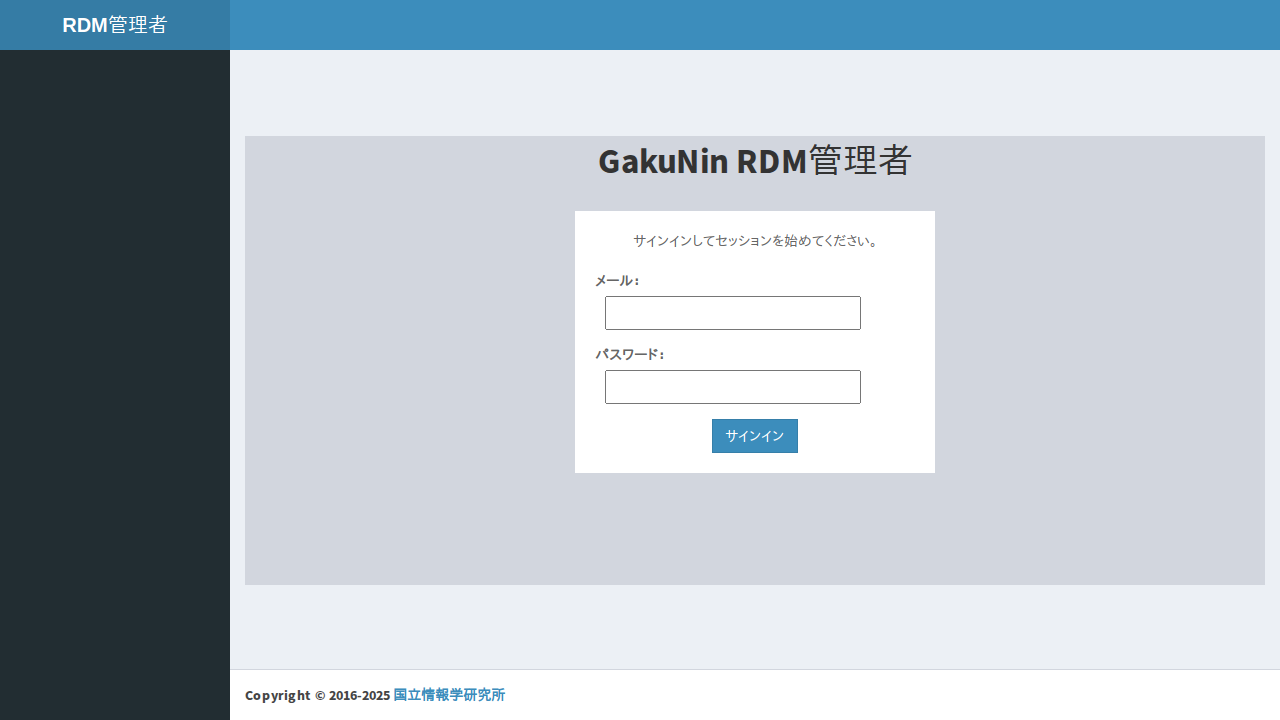

In [75]:
import time

async def _step(page):
    await page.goto(admin_rdm_url)

    await expect(page.locator('.login-logo')).to_be_visible(timeout=30000)

await run_pw(_step)

## ログイン情報を用いてGakuNin RDMにログインする

(IdPに関するログイン情報が与えられた場合、)
GakuNin Embeded DSのプルダウンを展開し、IdPリストから指定されたIdPを選択する。その後、アカウントのID/Passwordを入力して「Login」ボタンを押下する。

(IdPが指定されていない場合、)
CASのログイン操作を実施する。

Start epoch: 1745201448.337056 seconds


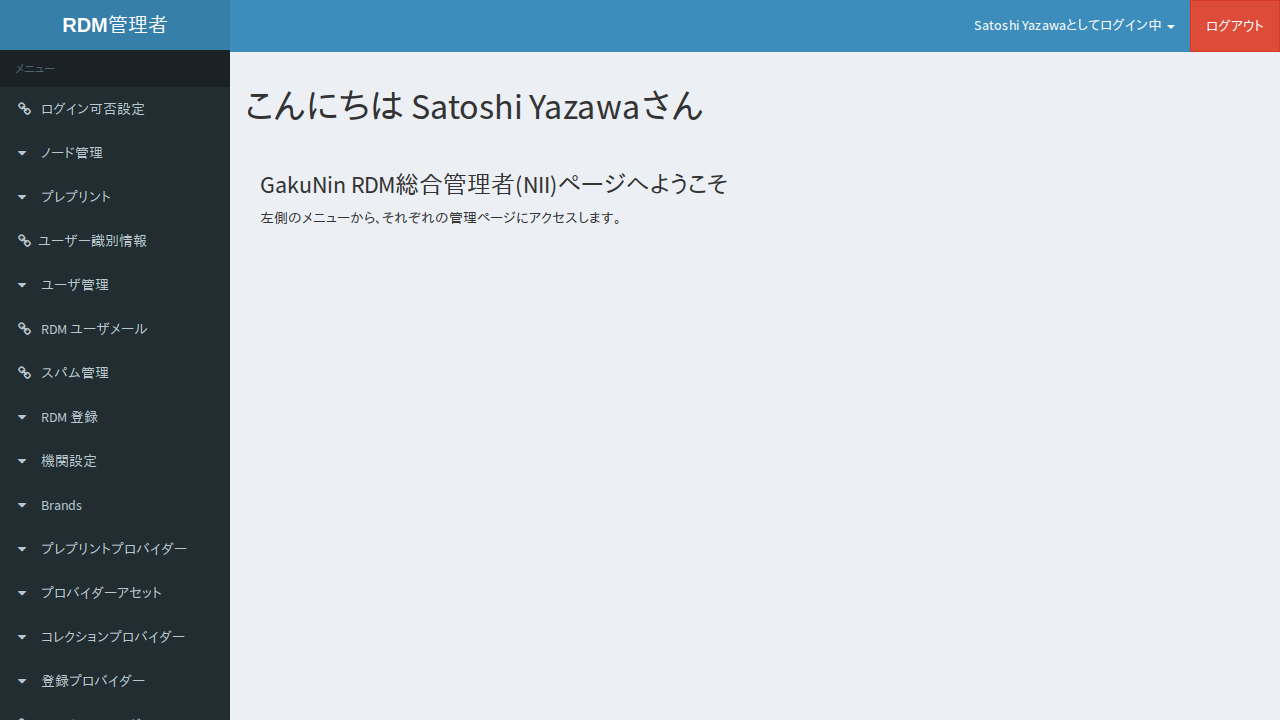

In [76]:
import scripts.grdm
importlib.reload(scripts.grdm)

async def _step(page):
    await scripts.grdm.login_as_admin(
        page, idp_name_1, idp_username_1, idp_password_1, transition_timeout=transition_timeout
    )

    await expect(page.locator('//*[contains(@class, "btn-danger") and contains(text(), "ログアウト")]')).to_be_enabled(timeout=transition_timeout)

await run_pw(_step)

## 「メンテナンスアラート」を選択する

「メンテナンス状態」が表示される

Start epoch: 1745201449.3732944 seconds


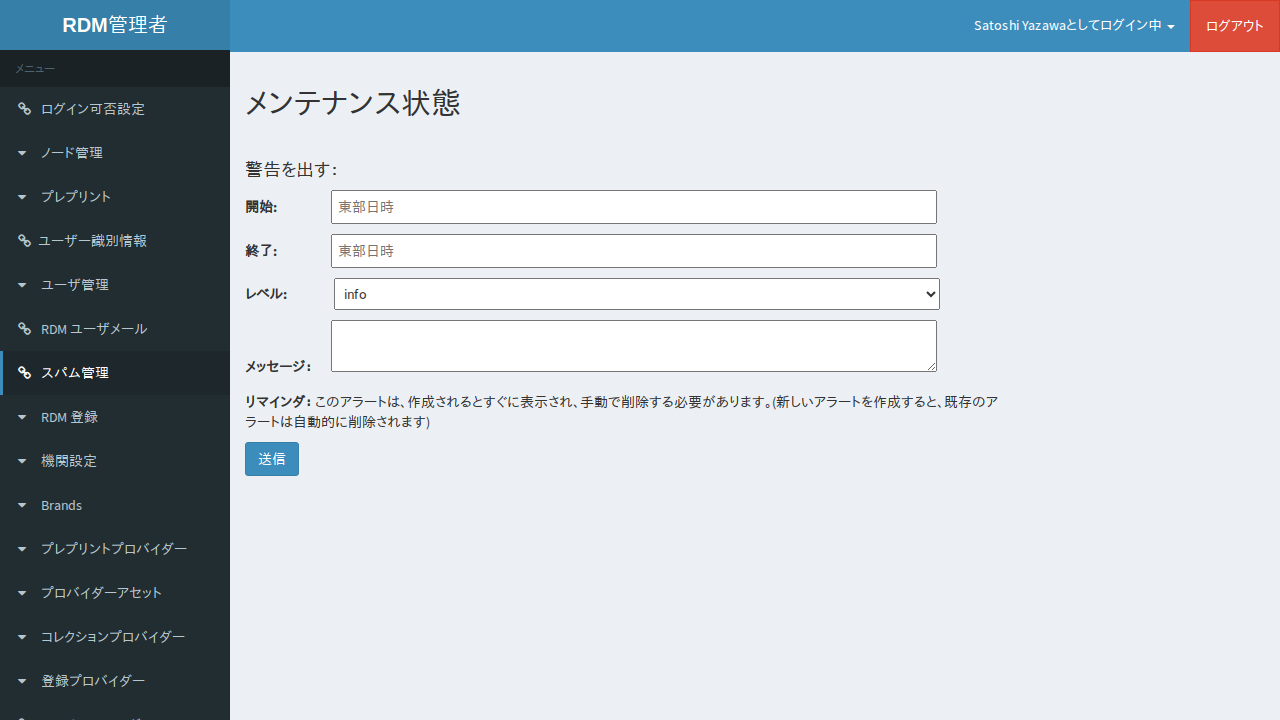

In [77]:
async def _step(page):
    await page.locator('//a[@href = "/maintenance/"]').click()

    await expect(page.locator('//h2[text() = "メンテナンス状態"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## 警告を出すフォームの開始欄をクリックする

カレンダーが表示される

Start epoch: 1745201449.825997 seconds


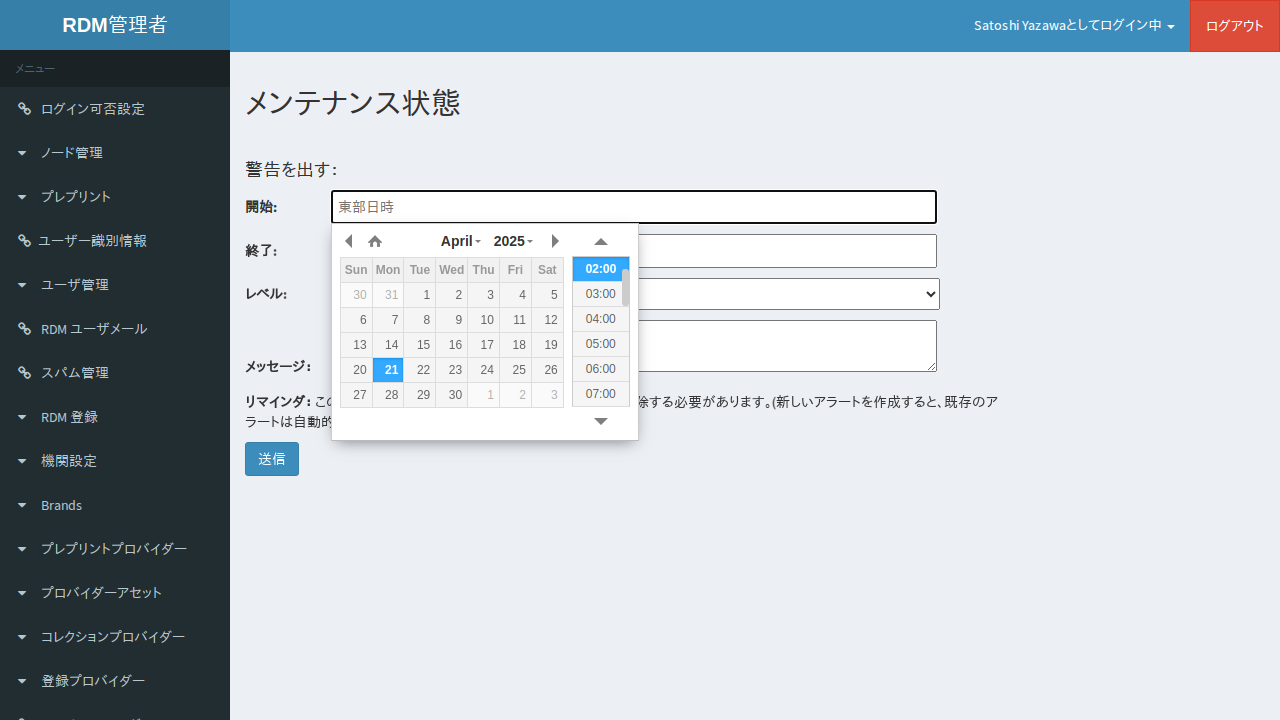

In [78]:
async def _step(page):
    await page.locator('//input[@name = "start"]').click()

    await expect(page.locator('//*[contains(@class, "xdsoft_datetimepicker")][1]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## カレンダーにて、日時を選択する

開始欄に選択した日時が表示される

Start epoch: 1745201450.1401808 seconds


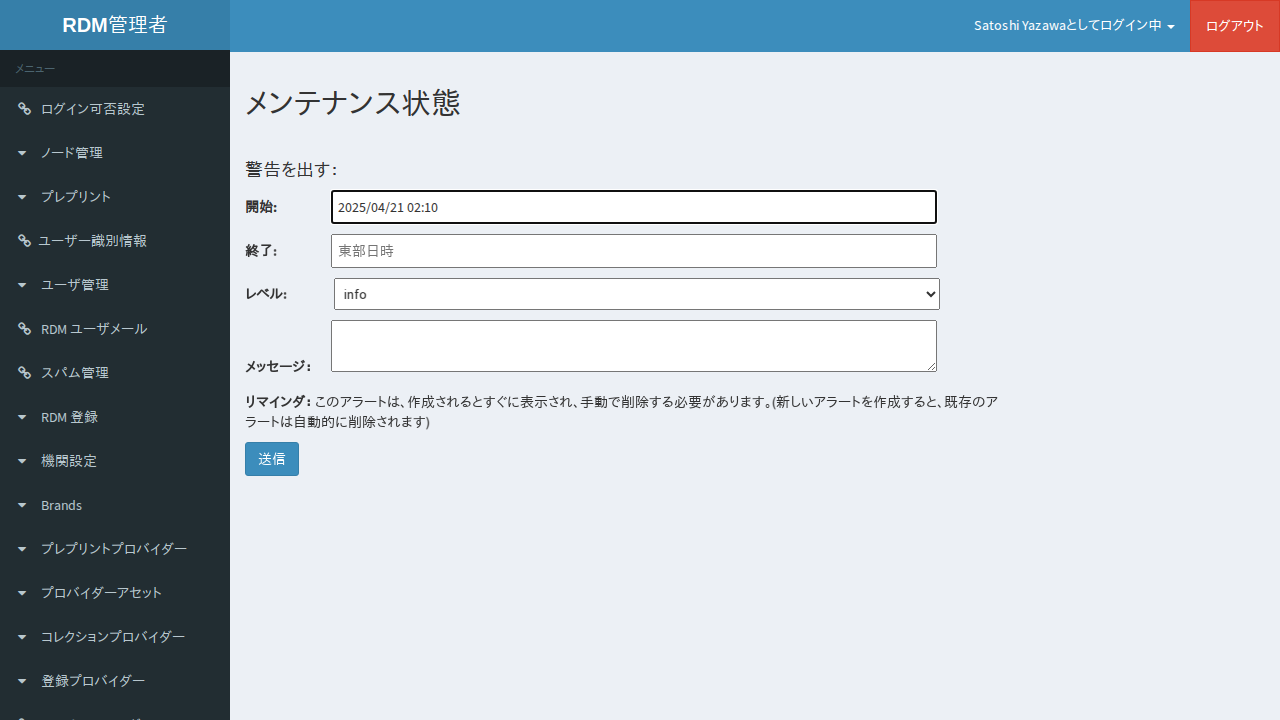

In [79]:
import re

async def _step(page):
    await page.locator('//*[contains(@class, "xdsoft_datetimepicker")][1]//td[contains(@class, "xdsoft_today")]/div').click()
    await page.locator('//input[@name = "start"]').click()

    await expect(page.locator('//input[@name = "start"]')).to_have_value(re.compile(r'[0-9]+\/[0-9]+\/[0-9]+\s+[0-9]+:[0-9]+'))

await run_pw(_step)

## 警告を出すフォームの終了欄をクリックする

カレンダーが表示される

Start epoch: 1745201450.3984995 seconds


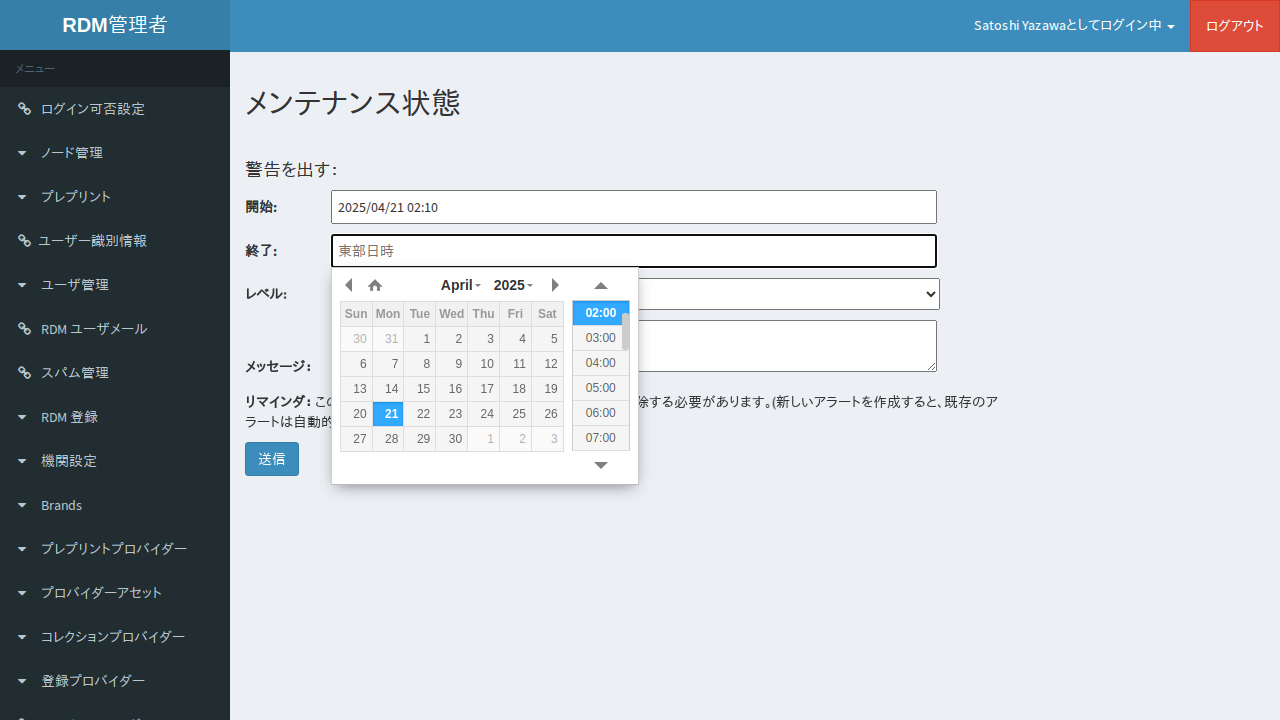

In [80]:
async def _step(page):
    await page.locator('//input[@name = "end"]').click()

    await expect(page.locator('//*[contains(@class, "xdsoft_datetimepicker")][2]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## カレンダーにて、日時を選択する

終了欄に選択した日時が表示される

Start epoch: 1745201450.691121 seconds


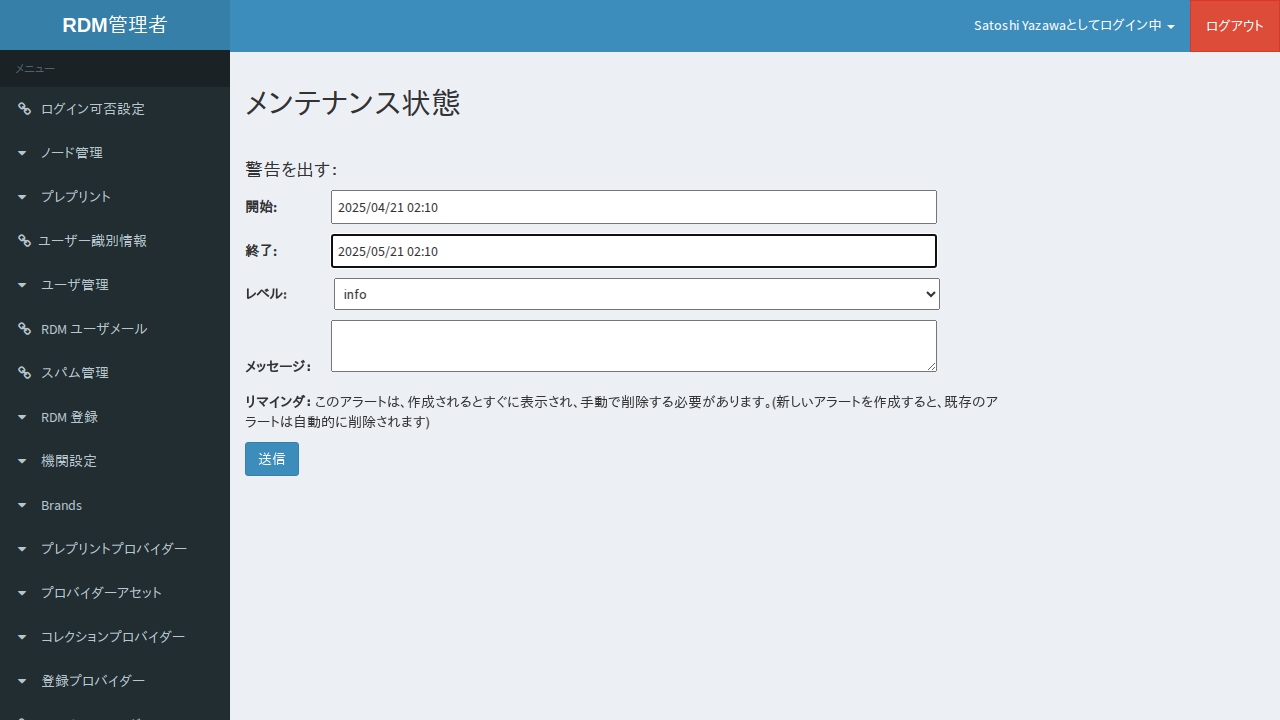

In [81]:
import re

async def _step(page):
    await page.locator('//*[contains(@class, "xdsoft_datetimepicker")][2]//*[@class = "xdsoft_monthpicker"]/button[@class = "xdsoft_next"]').click()
    await page.locator('//*[contains(@class, "xdsoft_datetimepicker")][2]//td[contains(@class, "xdsoft_current")]/div').click()
    await page.locator('//input[@name = "end"]').click()

    await expect(page.locator('//input[@name = "end"]')).to_have_value(re.compile(r'[0-9]+\/[0-9]+\/[0-9]+\s+[0-9]+:[0-9]+'))

await run_pw(_step)

## 終了欄に選択した日時が表示される

infoが選択できることを確認する

Start epoch: 1745201450.9687338 seconds


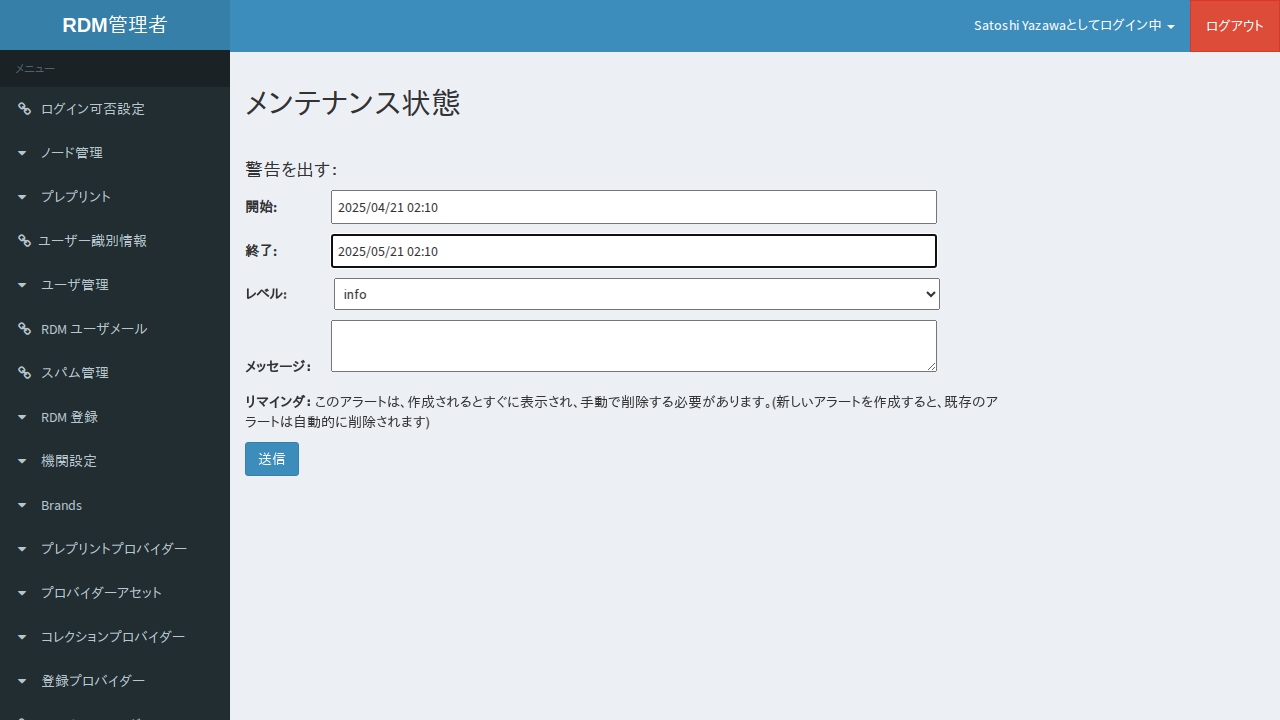

In [82]:
async def _step(page):
    await page.locator('#id_level').select_option('info')

    await expect(page.locator('#id_level')).to_have_value('1')

await run_pw(_step)

## 警告を出すフォームのメッセージ欄に文言を入力し、「送信」ボタンを押下する


メンテナンスアラートが作成される

Start epoch: 1745201451.1351297 seconds


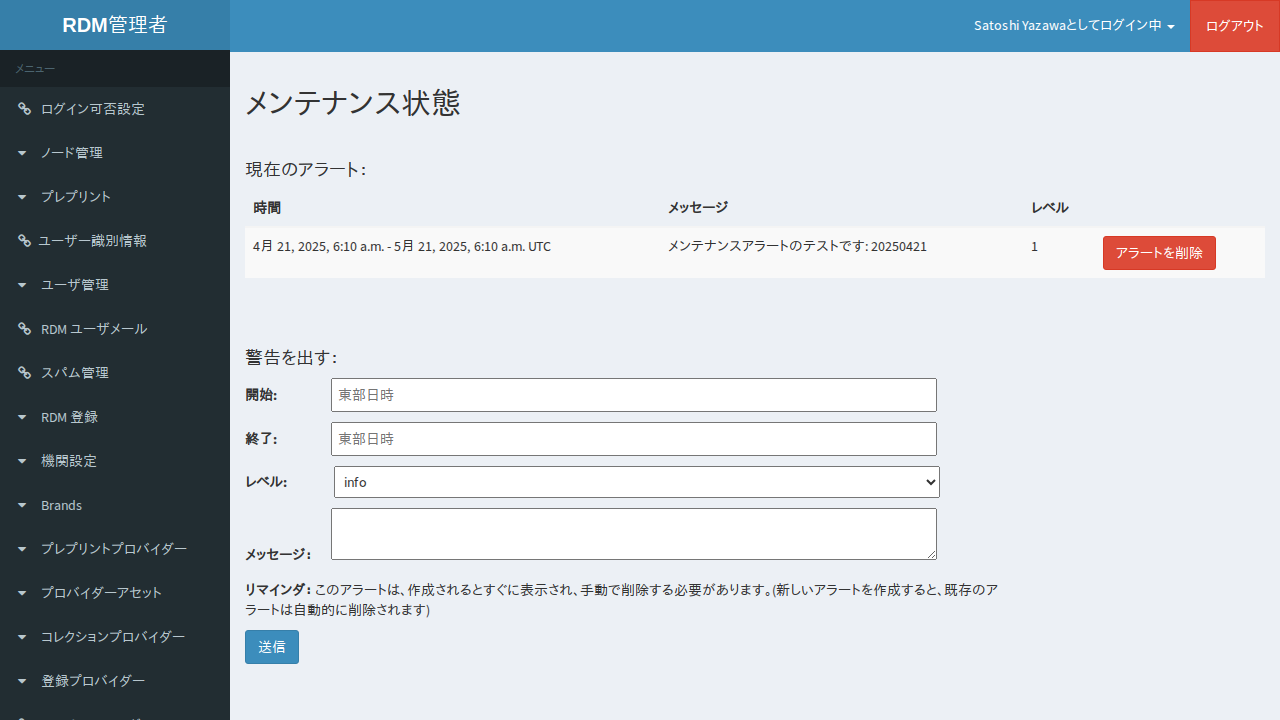

In [83]:
from datetime import datetime

yyyymmdd = datetime.now().strftime('%Y%m%d')

async def _step(page):
    await page.locator('//textarea[@name = "message"]').fill(f'メンテナンスアラートのテストです: {yyyymmdd}')

    await expect(page.locator('//input[@type = "submit"]')).to_be_enabled()
    await page.locator('//input[@type = "submit"]').click()
    await expect(page.locator('//h4[contains(text(), "現在のアラート：")]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## GakuNin RDMのページに移動する

GakuNin RDMのTOPページが開かれる

Start epoch: 1745201451.615892 seconds


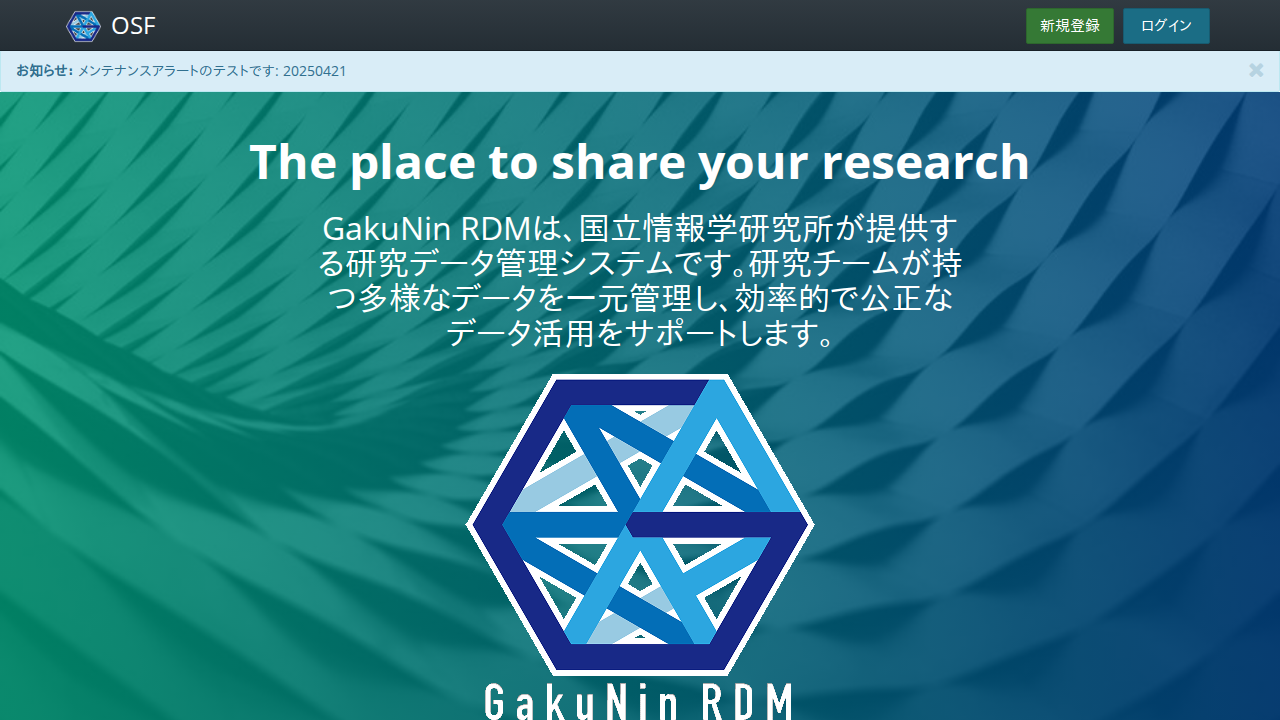

In [84]:
import time

async def _step(page):
    await page.goto(rdm_url)

    # 同意する ボタンが現れるまで待つ
    await expect(page.locator('//button[text() = "同意する"]')).to_be_visible(timeout=transition_timeout)

    # 同意する をクリック
    await page.locator('//button[text() = "同意する"]').click()

    # 同意する が表示されなくなったことを確認
    await expect(page.locator('//button[text() = "同意する"]')).to_have_count(0, timeout=500)

await run_pw(_step)

## ログイン情報を用いてGakuNin RDMにログインする

(IdPに関するログイン情報が与えられた場合、)
GakuNin Embeded DSのプルダウンを展開し、IdPリストから指定されたIdPを選択する。その後、アカウントのID/Passwordを入力して「Login」ボタンを押下する。

(IdPが指定されていない場合、)
CASのログイン操作を実施する。

Start epoch: 1745201453.7993698 seconds


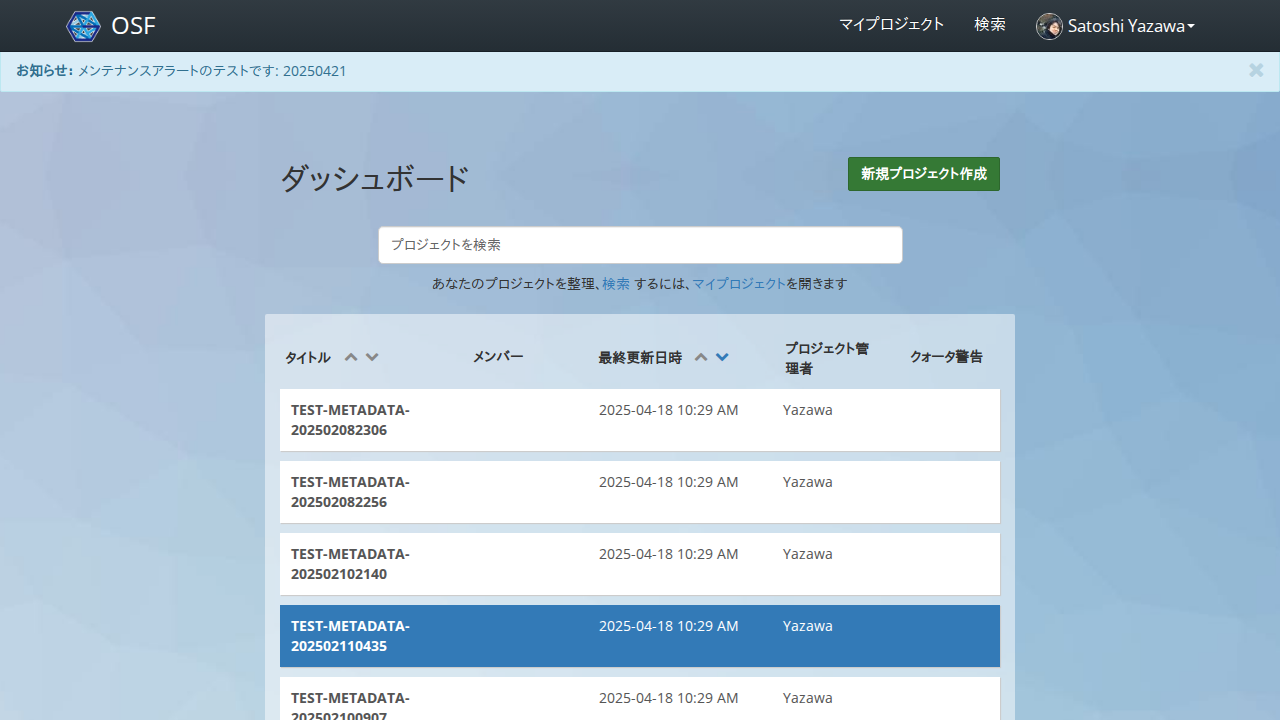

In [85]:
import scripts.grdm
importlib.reload(scripts.grdm)

async def _step(page):
    await scripts.grdm.login(
        page, idp_name_1, idp_username_1, idp_password_1, transition_timeout=transition_timeout
    )

    await scripts.grdm.expect_dashboard(page, transition_timeout=transition_timeout)

await run_pw(_step)

## 表示されているアラートのバーを削除する

アラートのバーが削除される

Start epoch: 1745201458.0747955 seconds


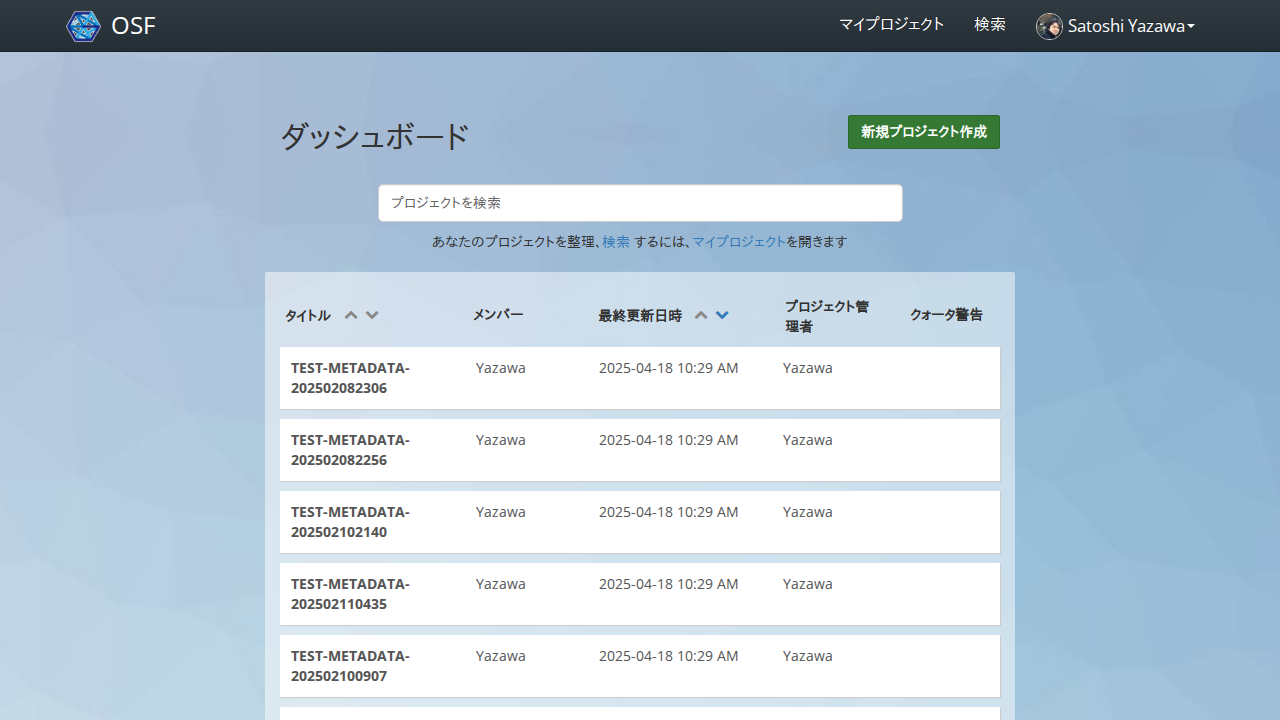

In [86]:
async def _step(page):
    await expect(page.locator('//*[@data-analytics-scope="Maintenance banner"]')).to_have_text(re.compile(r'メンテナンスアラート'))

    await page.locator('//*[@data-analytics-scope="Maintenance banner"]//button[contains(@class, "close")]').click()
    
    await expect(page.locator('//*[@data-analytics-scope="Maintenance banner"]')).to_have_count(0)

await run_pw(_step)

## RDM管理者ページに戻る

RDM管理者ページが表示される

Start epoch: 1745201458.3154747 seconds


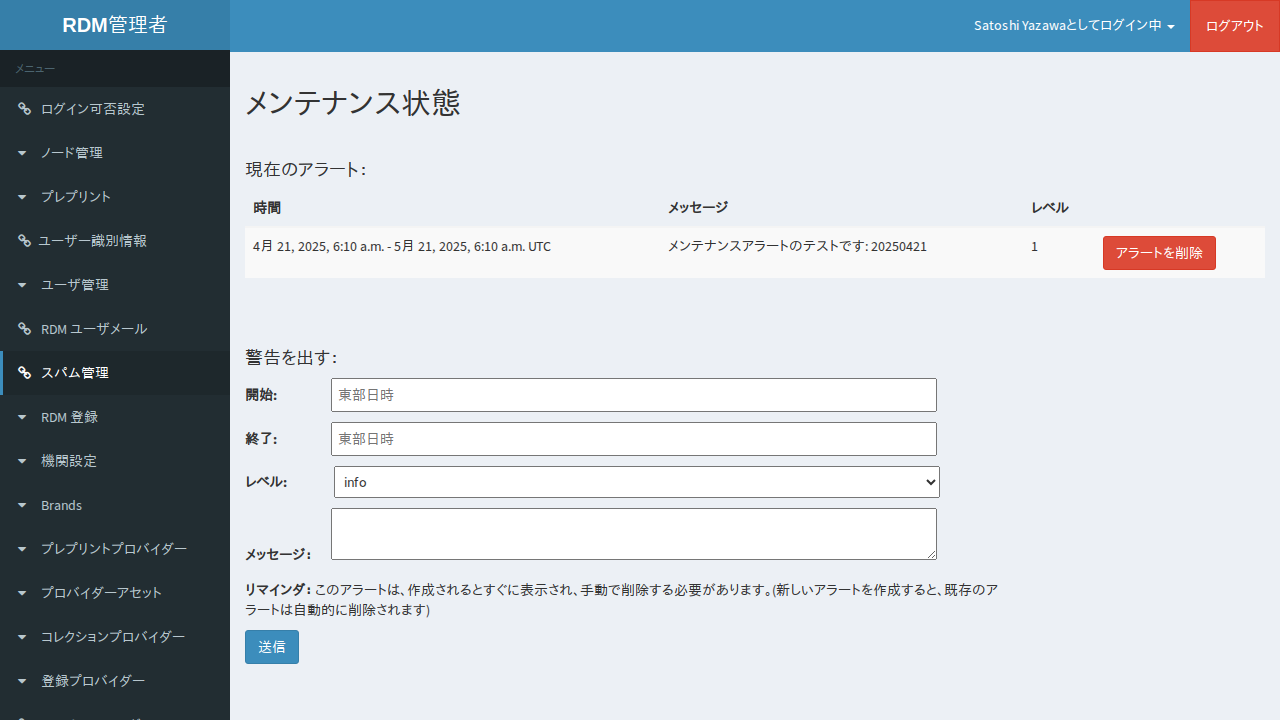

In [87]:
async def _step(page):
    await page.goto(admin_rdm_url)
    await page.locator('//a[@href = "/maintenance/"]').click()

    await expect(page.locator('//h2[text() = "メンテナンス状態"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## 「メンテナンスアラート」の作成したアラートの「アラートを削除」をクリックする

「このメンテナンスアラートを削除してもよろしいですか？」と表示される

Start epoch: 1745201458.8568456 seconds


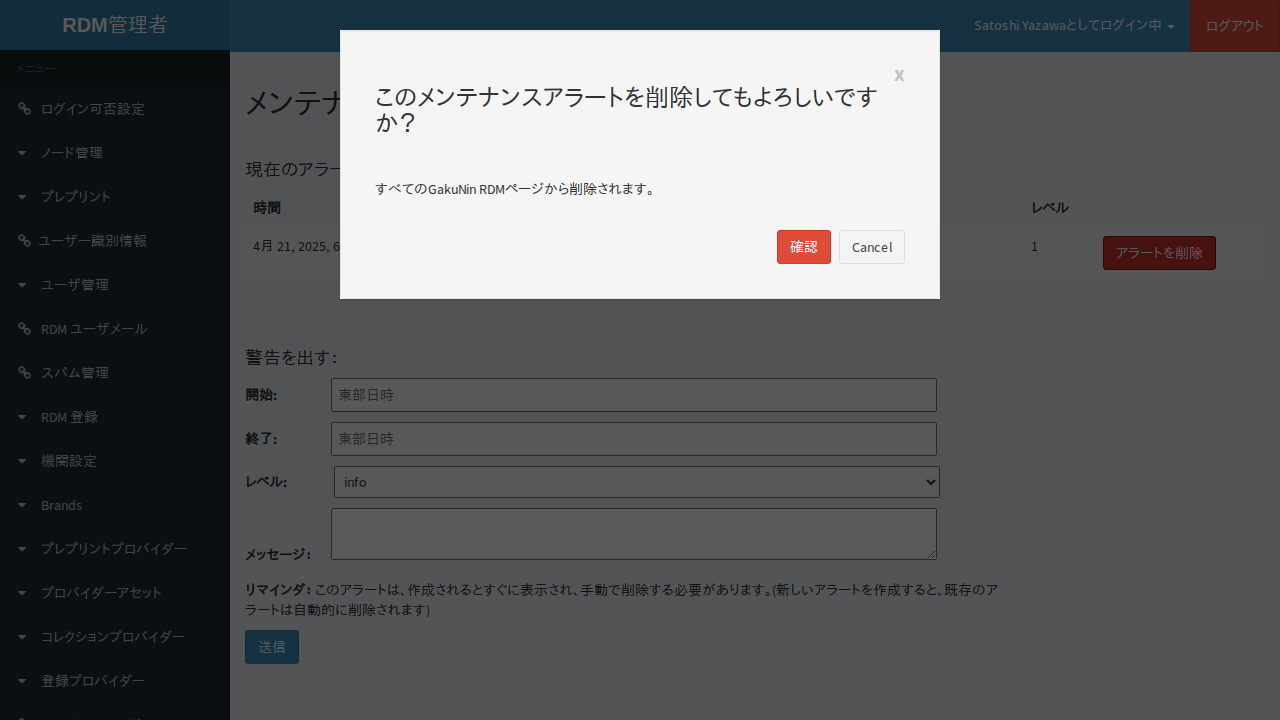

In [88]:
async def _step(page):
    await page.locator('//a[contains(text(), "アラートを削除")]').click()

    await expect(page.locator('//input[@type = "submit" and @value = "確認"]')).to_be_enabled(timeout=transition_timeout)

await run_pw(_step)

## 「確認」をクリックする

Start epoch: 1745201459.4389663 seconds


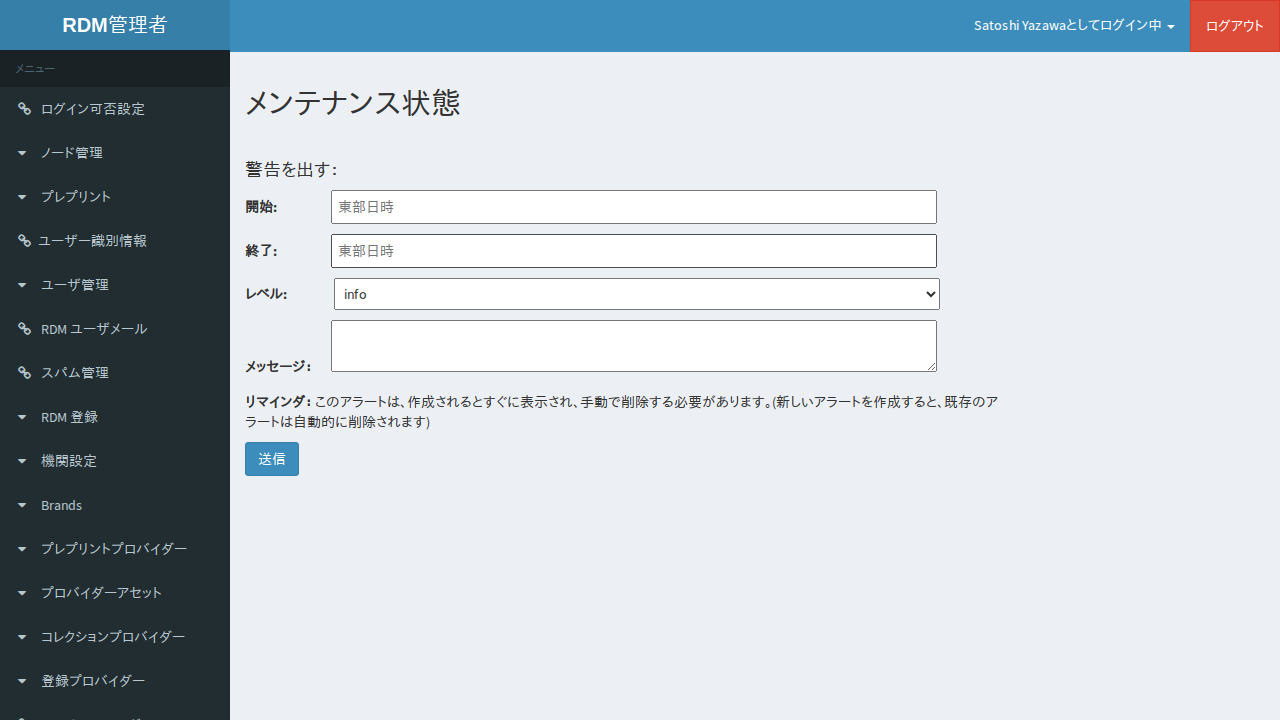

In [89]:
async def _step(page):
    await page.locator('//input[@type = "submit" and @value = "確認"]').click()

    await expect(page.locator('//h2[text() = "メンテナンス状態"]')).to_be_visible(timeout=transition_timeout)
    await expect(page.locator('//h4[contains(text(), "現在のアラート：")]')).to_have_count(0, timeout=transition_timeout)

await run_pw(_step)

終了処理を実施。

In [90]:
await finish_pw_context()

Video: /tmp/tmp_hyp1vm9/video-1.webm
HAR: /tmp/tmp_hyp1vm9/har.zip


In [91]:
!rm -fr {work_dir}